In [3]:
library('igraph')
library('Matrix')
library('pracma')
library('resample')

## Question 1

In [23]:
# 1a

set.seed(0)
g1a = sample_gnp(1000, 0.01, directed=F)
diameter_1a_1000 = diameter(g1a, directed=FALSE)
cat(paste("Diameter of the Network with 1000 nodes: ", diameter_1a_1000))

Diameter of the Network with 1000 nodes:  6

In [5]:
# helper functions

create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}


random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    end_nodes = numeric(length=num_steps)
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)
        end_nodes[i] = v
    }
    
    return(end_nodes)
}


plot_with_lastnodes = function (g, steps, itr_times=1000){
    
    g.components <- clusters(g)
    ix <- which.max(g.components$csize)
    g.giant <- induced.subgraph(g, which(g.components$membership == ix))
    
    trans_matrix = create_transition_matrix(g.giant)
    
    set.seed(0)
    nodes = matrix(NA, nrow=itr_times, ncol=steps)
    last_nodes = array(1:itr_times)
    for(i in 1:itr_times){
        start_node = sample(1:vcount(g.giant), 1)
        row_nodes = random_walk(g.giant, steps, start_node, trans_matrix)
        last_nodes[i] = row_nodes[steps]
        nodes[i, ] = shortest.paths(g.giant, row_nodes, start_node)
    }
    
    plot(colMeans(nodes), main='Average Distance <s(t)> v.s. t', xlab='t', ylab='<s(t)>')
    plot(colVars(nodes), main=expression(paste('Variance ', sigma^2, ' v.s. t')),
         xlab='t', ylab=expression(paste(sigma^2, '(t)')))
    
    return(last_nodes)
}

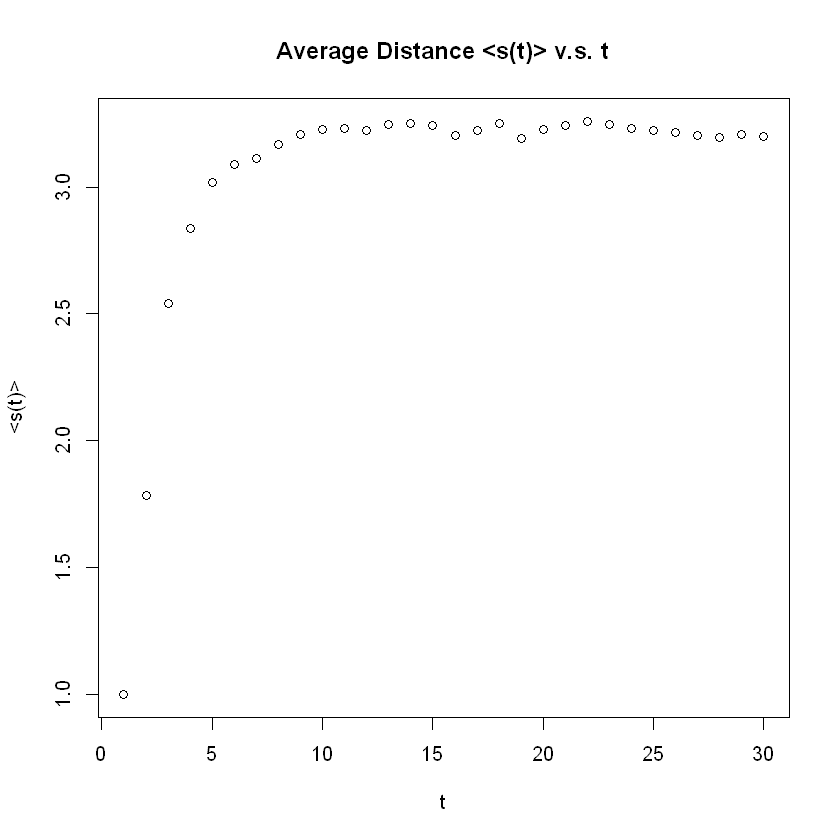

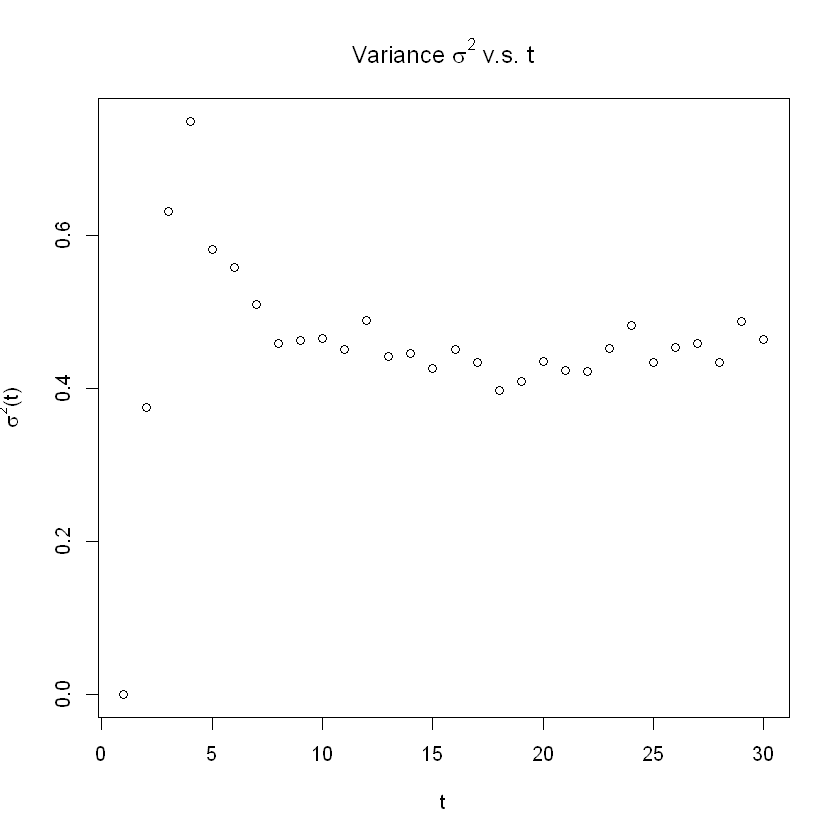

In [21]:
# 1b

last_nodes_1a = plot_with_lastnodes(g1a, 30)

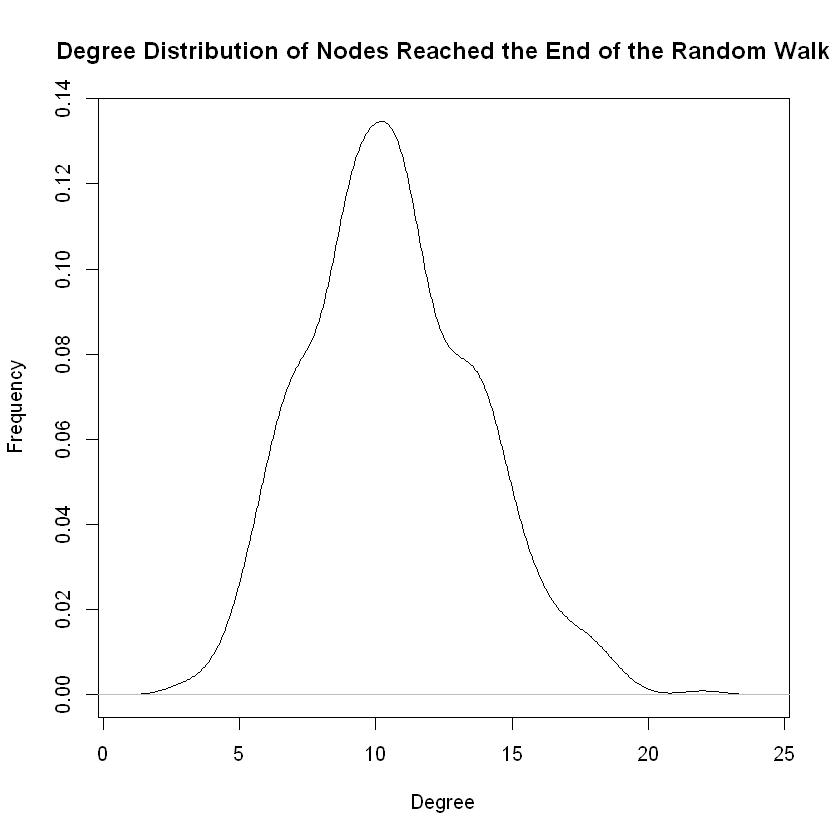

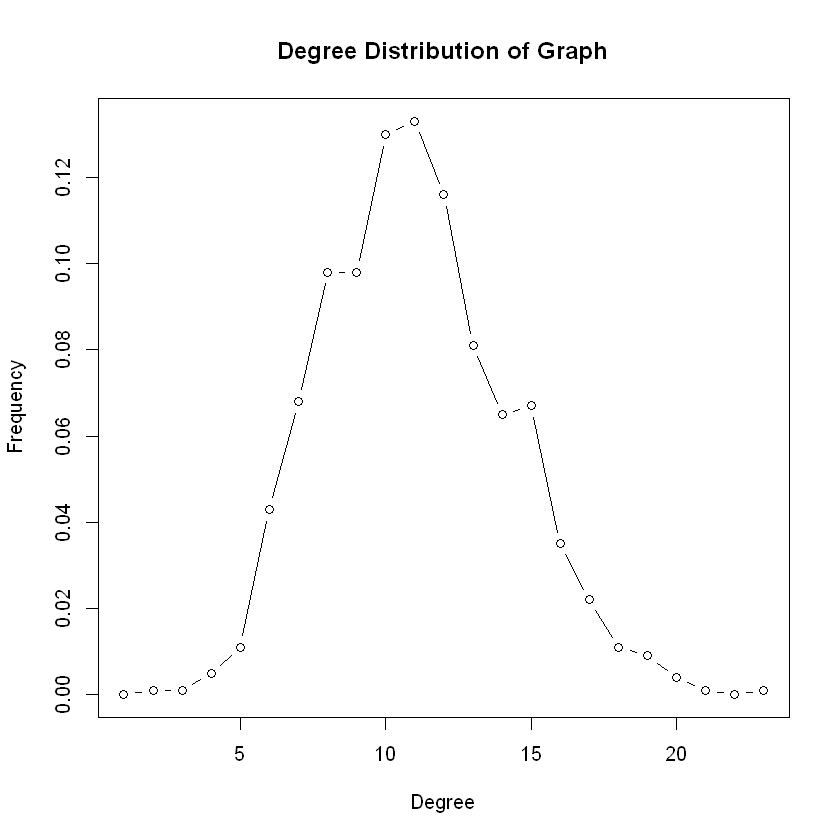

In [34]:
# 1c
plot(density(degree(g1a, unique(last_nodes_1a))), type="l", 
     main="Degree Distribution of Nodes Reached the End of the Random Walk", xlab="Degree", ylab="Frequency")
plot(degree.distribution(g1a), type="b", main="Degree Distribution of Graph", xlab="Degree", ylab="Frequency")

Diameter of the Network with 10000 nodes:  3

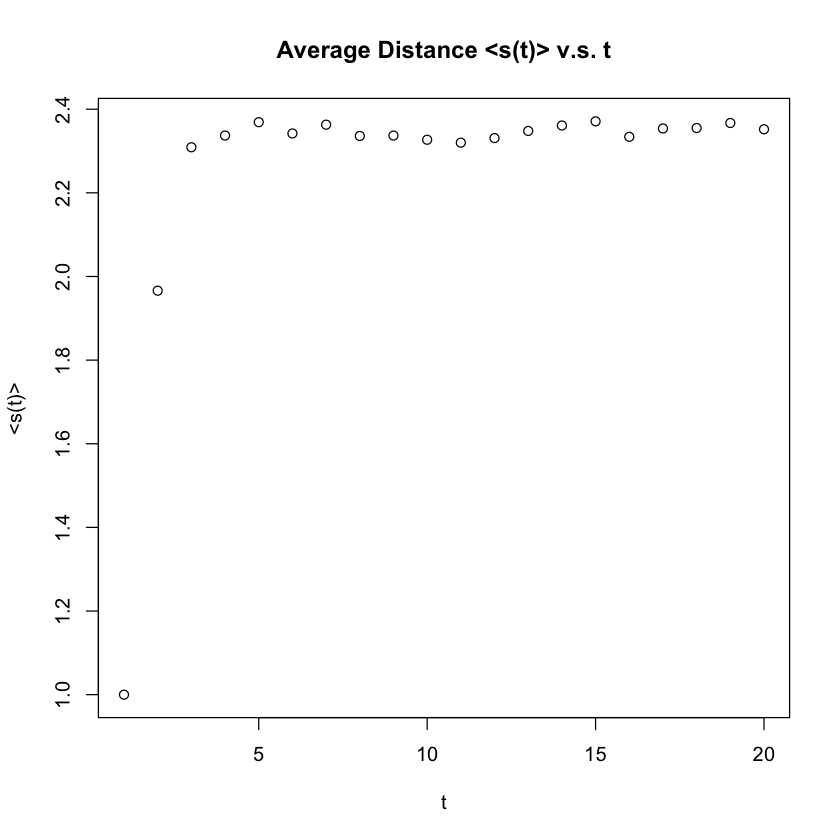

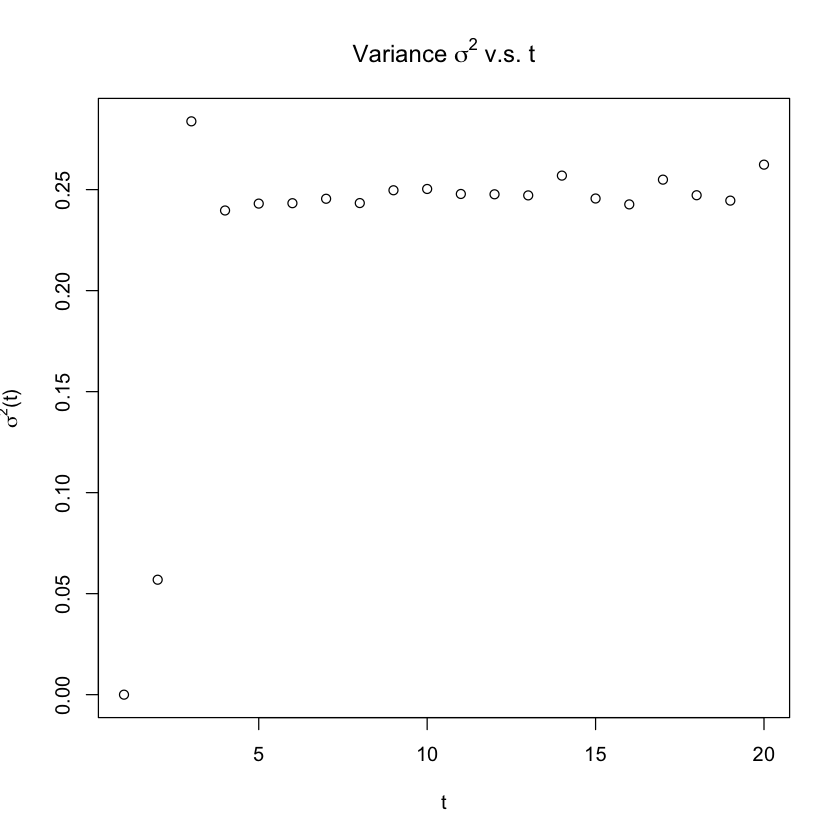

In [45]:
# 1d

set.seed(0)
g1d = sample_gnp(10000, 0.01, directed=F)
diameter_1d_10000 = diameter(g1d, directed=FALSE)
cat(paste("Diameter of the Network with 10000 nodes: ", diameter_1d_10000))

last_nodes_1d = plot_with_lastnodes(g1d, 20)

## Question 2

In [46]:
# 2a

g2a = sample_pa(1000, m=1, directed=F)
diameter_2a_1000 = diameter(g2a, directed=FALSE)
cat(paste("Diameter of the Network with 1000 nodes: ", diameter_2a_1000))

Diameter of the Network with 1000 nodes:  22

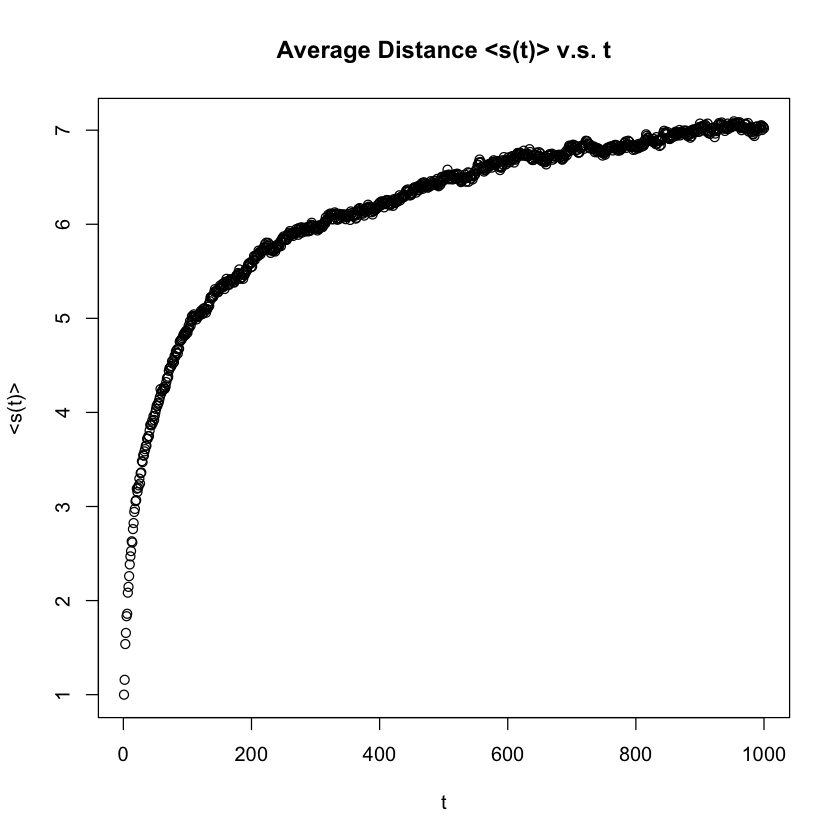

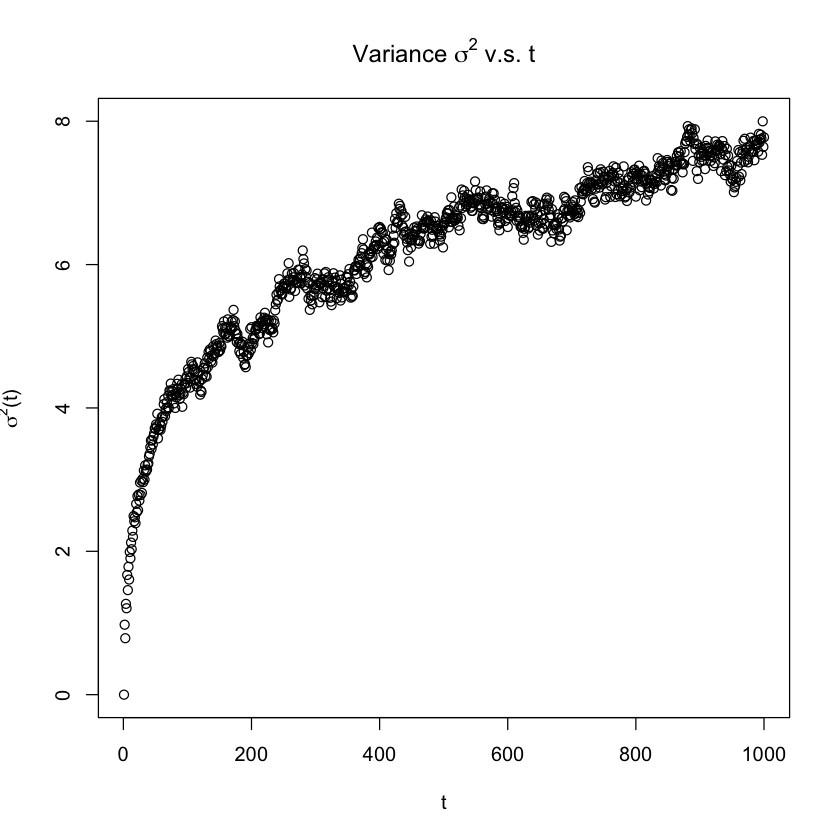

In [47]:
# 2b

last_nodes_2a = plot_with_lastnodes(g2a, 1000)

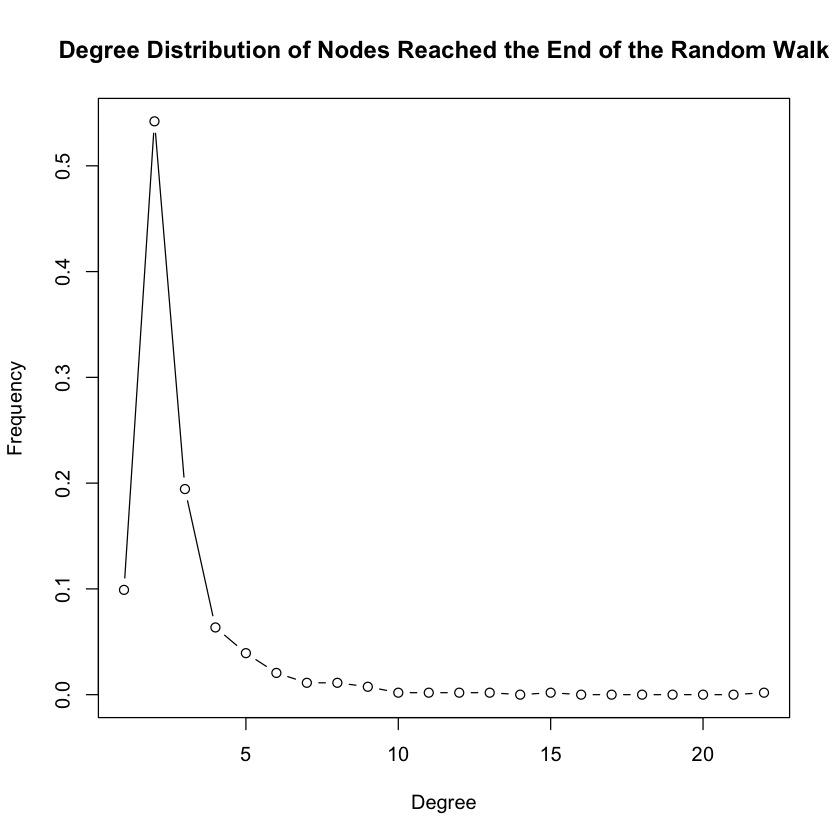

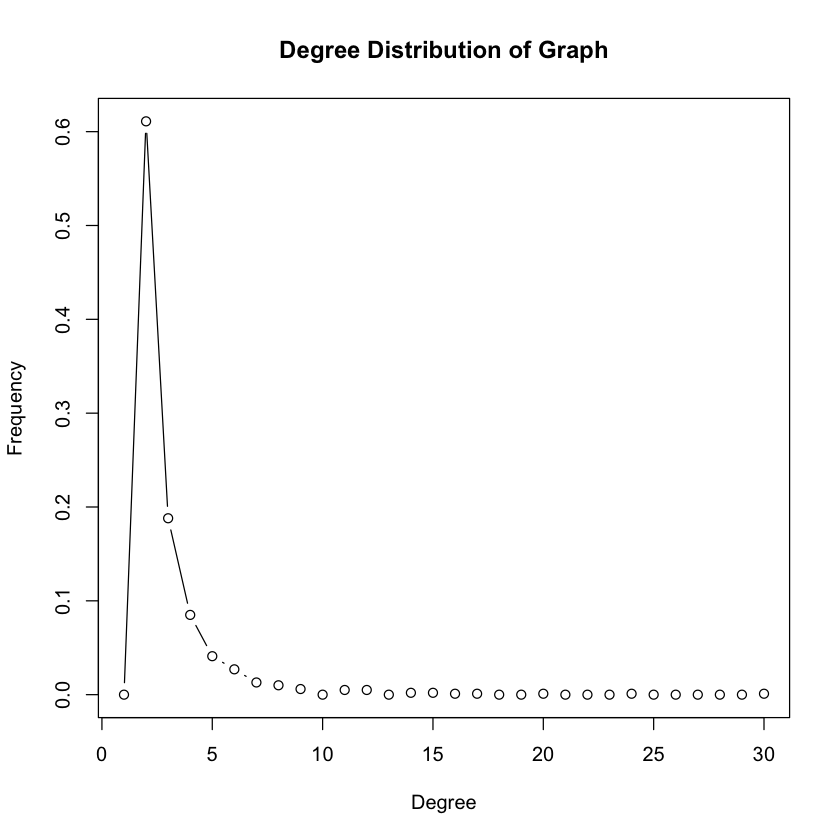

In [48]:
# 2c

plot(degree.distribution(induced.subgraph(g2a, last_nodes_2a)), type="b", 
     main="Degree Distribution of Nodes Reached the End of the Random Walk", xlab="Degree", ylab="Frequency")
plot(degree.distribution(g2a), type="b", main="Degree Distribution of Graph", xlab="Degree", ylab="Frequency")

Diameter of the Network with 100 nodes:  12

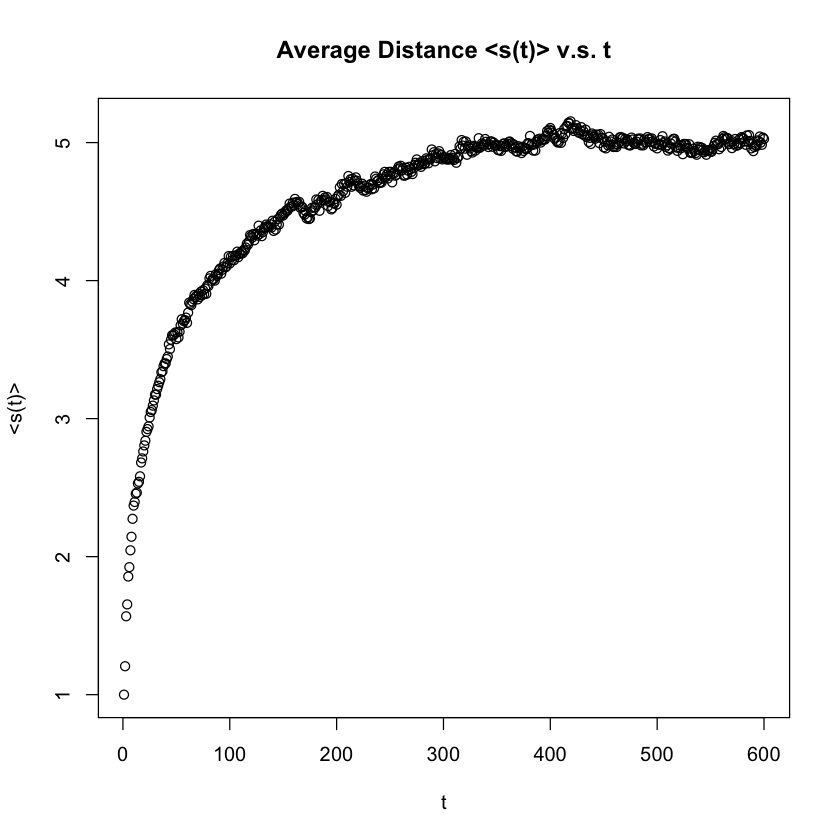

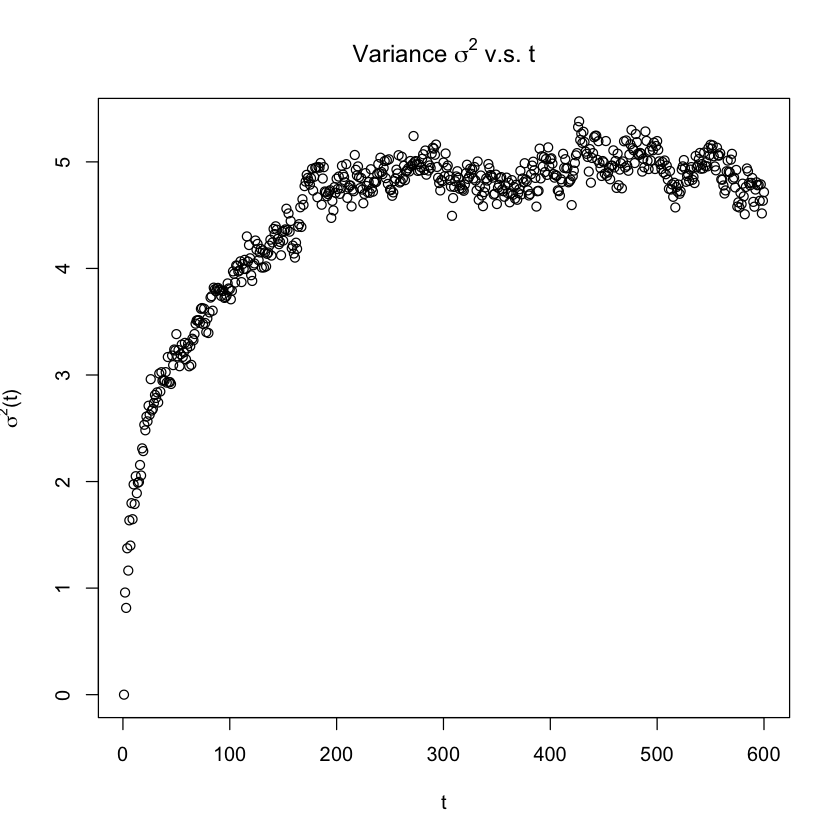

In [49]:
# 2d - 100 nodes

g2d_100 = sample_pa(100, m=1, directed=F)
diameter_2d_100 = diameter(g2d_100, directed=FALSE)
cat(paste("Diameter of the Network with 100 nodes: ", diameter_2d_100))

last_nodes_2d_100 = plot_with_lastnodes(g2d_100, 600)

Diameter of the Network with 10000 nodes:  30

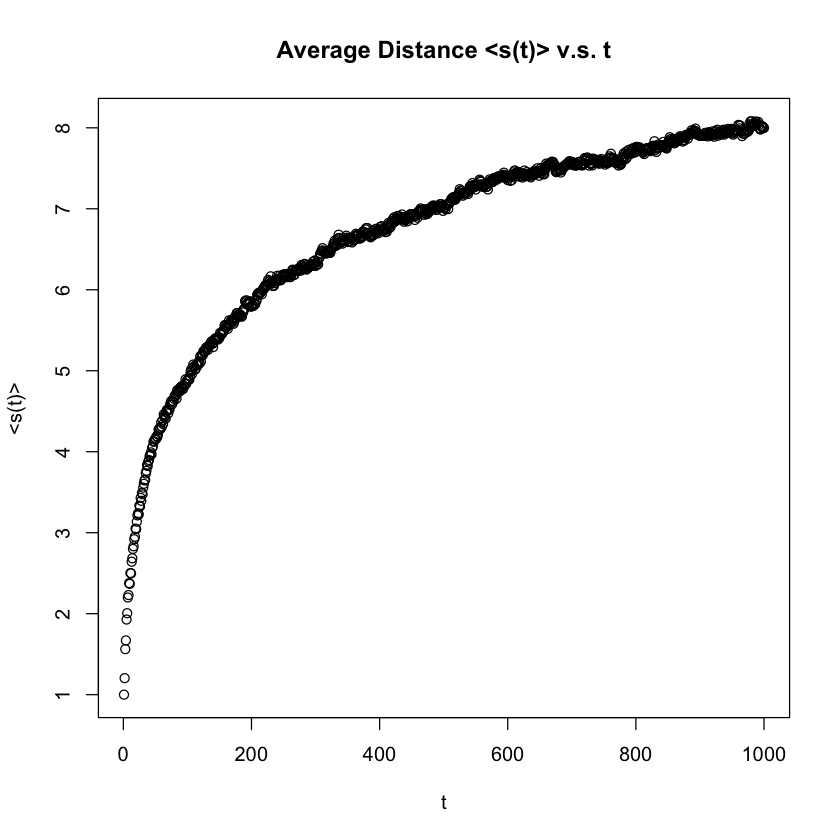

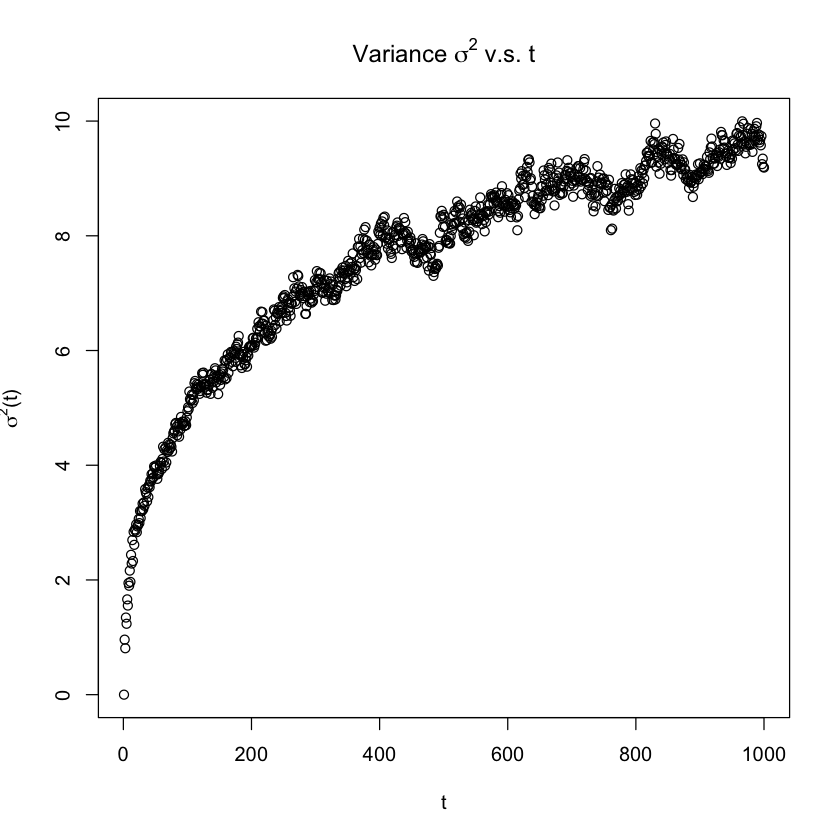

In [50]:
# 2d - 10000 nodes

g2d_10000 = sample_pa(10000, m=1, directed=F)
diameter_2d_10000 = diameter(g2d_10000, directed=FALSE)
cat(paste("Diameter of the Network with 10000 nodes: ", diameter_2d_10000))

last_nodes_2d_10000 = plot_with_lastnodes(g2d_10000, 1000)

## Question 3

## Question 4